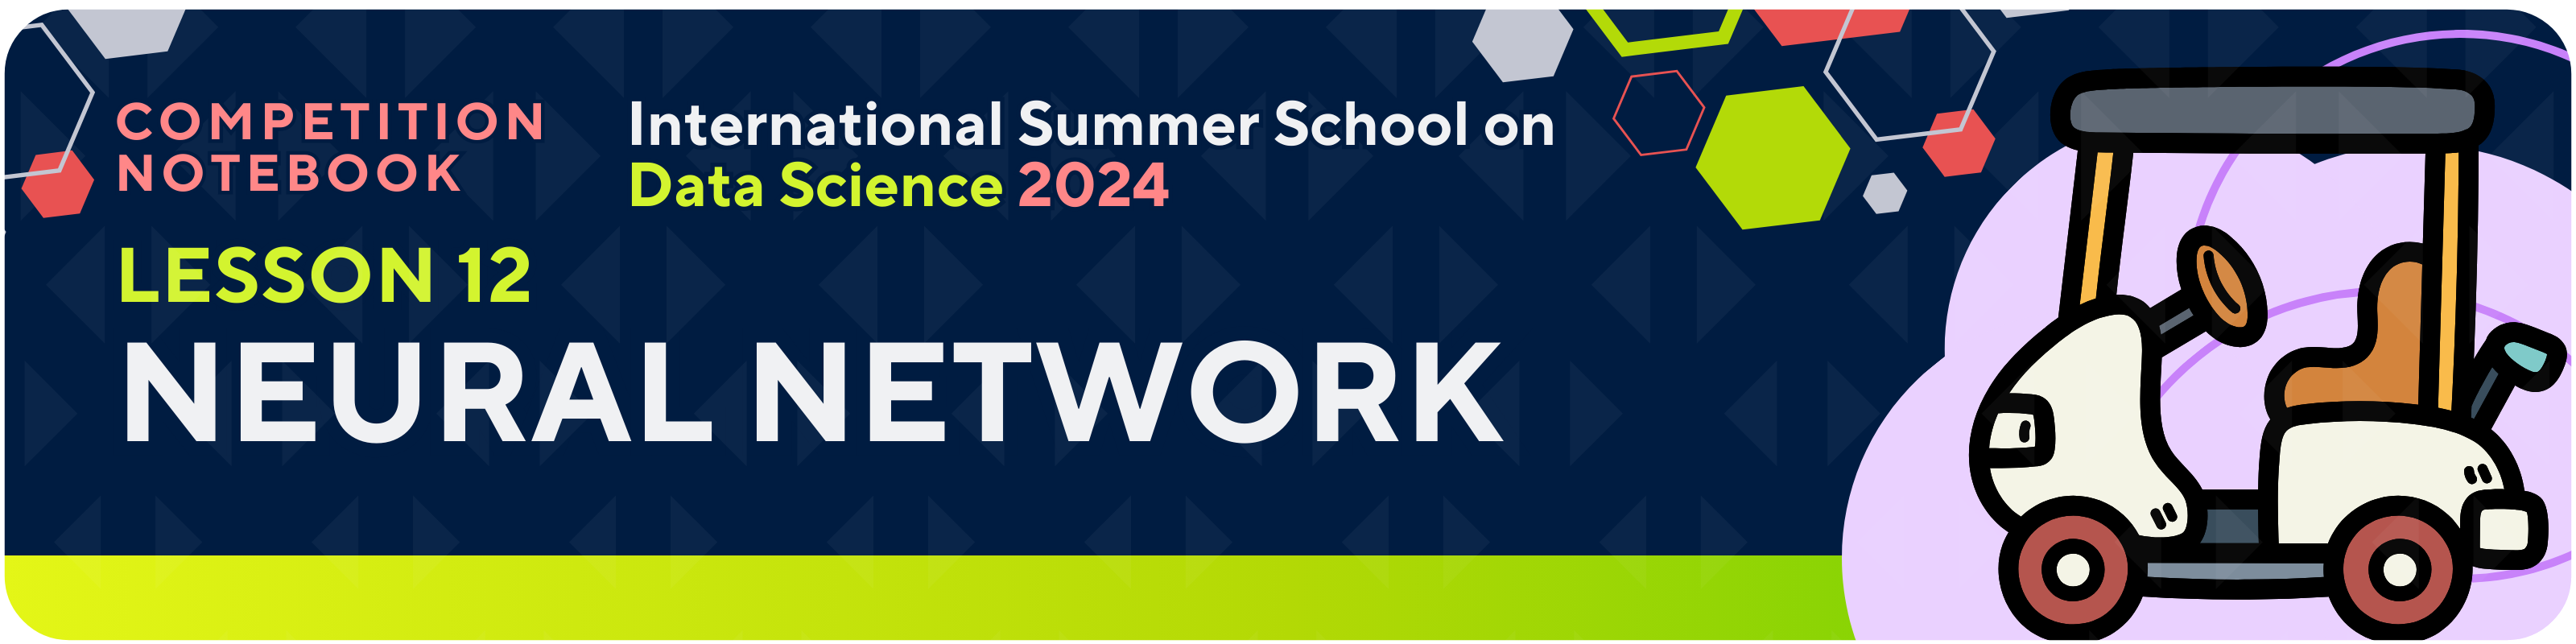

<font size=2>

**How to Enable GPU Acceleration:**
* In main navigation of Google Colab above, go to 'Runtime' > 'Change runtime'
* Under 'Hardware accelerator', select 'T4 GPU'
</font>

## **🎯      Goal**

Your goal is to **classify the types of
clothing** with one of the following 10 classes.<br><br>

<img src="https://i.imgur.com/WnY3kEh.png" width=800 />

## **1**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Import Libraries**


In [ ]:
# Basic Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
import random

# Data Preprocessing
from sklearn.pipeline        import Pipeline

# Model Validation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics         import accuracy_score, mean_squared_error, r2_score

# Model Building
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

## **2**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Load Training Dataset**



In [ ]:
# Load the train dataset
train_url = "https://www.dropbox.com/scl/fi/6tgxge3y0jot8075d5lng/train_imageclass.csv?rlkey=b4cj2ifgbzjlrcmals3t98eu2&st=zmwpkgke&dl=0&raw=1"
df_train = pd.read_csv(train_url, index_col='ID')

target_col = 'label'
df_train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59998,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,3



## **3**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Set Feature Matrix & Target Variable**



In [ ]:
# Set training set and label
X_train = df_train.drop(columns='label')
y_train = df_train['label']

## **4**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Explore the Data**

In [ ]:
df_train['label'].value_counts()

label
9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
Name: count, dtype: int64

## **5**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Perform Preprocessing**


In [ ]:
# Set training set and label
X_train = df_train.drop(columns='label')
y_train = df_train['label']

# Reshaping x_train into 2D and normalize
X_train = X_train.values.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
y_train = y_train.values

# One-hot encoding of labels
num_classes = 10
y_train = np.eye(num_classes)[y_train.reshape(-1)]

### Visualize the Preprocessed Data

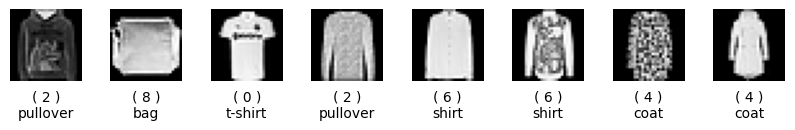

In [ ]:
classes = np.array(['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt',
                    'sneaker', 'bag', 'boot'])

n_to_show = 8
indices = np.random.choice(range(len(X_train)), n_to_show)
fig = plt.figure(figsize=(10, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = X_train[idx].reshape(28, 28)
    label_index = np.argmax(y_train[idx])  # Get the index of the highest probability
    label = classes[label_index]  # Map the index to the corresponding class name
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis('off')
    ax.text(0.5, -0.5, f'( {label_index} )\n{label}', ha='center', transform=ax.transAxes)
    ax.imshow(img, cmap='gray')  # Display in grayscale

plt.show()


## **6**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Make Neural Network Model**



In [ ]:
def create_model(hp=None):
    nodes = hp.Choice('num_nodes', values=[16, 32, 64, 128]) if hp else 128
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2,
                             sampling='log') if hp else 0.001

    model = Sequential([
        Input(shape=(28, 28, 1)),
        Flatten(),
        Dense(nodes, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model()


## **7**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Tune Hyperparameters**



In [ ]:
#!pip install keras-tuner -q

In [ ]:
# import keras_tuner as kt

# # Perform the search
# tuner = kt.Hyperband(create_model, objective='val_accuracy', max_epochs=10, factor=3)
# tuner.search(X_train, y_train, epochs=3, validation_split=0.2)

# # Get the best model and hyperparameters
# best_model = tuner.get_best_models(num_models=1)[0]
# best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# print(f"Best hyperparameters: {best_hyperparameters.values}")

# # Build the model using the best hyperparameters
# model = tuner.hypermodel.build(best_hyperparameters)


## **8**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Fit the Model**



In [ ]:
history = model.fit(X_train, y_train, epochs=5,
                    batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 5s 6ms/step - loss: 0.5388 - accuracy: 0.8136 - val_loss: 0.4262 - val_accuracy: 0.8530
Epoch 2/5
750/750 [==============================] - 3s 3ms/step - loss: 0.4033 - accuracy: 0.8573 - val_loss: 0.4288 - val_accuracy: 0.8382
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.3659 - accuracy: 0.8689 - val_loss: 0.3678 - val_accuracy: 0.8676
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.3354 - accuracy: 0.8786 - val_loss: 0.3584 - val_accuracy: 0.8723
Epoch 5/5
750/750 [==============================] - 4s 5ms/step - loss: 0.3129 - accuracy: 0.8849 - val_loss: 0.3809 - val_accuracy: 0.8602


### Visualize Training & Validation Loss

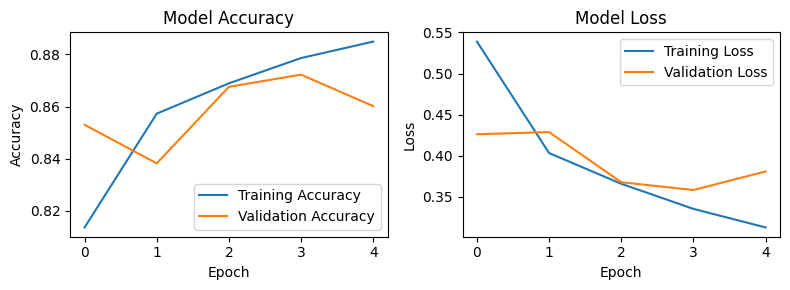

In [ ]:
# Plotting accuracy and loss
plt.figure(figsize=(8, 3))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## **9**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Make Prediction**



In [ ]:
# Load the train dataset
test_url = "https://www.dropbox.com/scl/fi/r8tjg2dea59q5timei3dg/test_imageclass.csv?rlkey=1dzvhckz1x9x3e05vgp00lm6f&st=qnmdgala&dl=0&raw=1"
df_test = pd.read_csv(test_url, index_col='ID')

# Preprocess the test set
X_test = df_test.values.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

# Making prediction
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


### Visualize the prediction

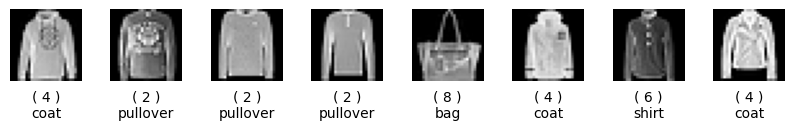

In [ ]:
classes = np.array(['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt',
                    'sneaker', 'bag', 'boot'])

n_to_show = 8
indices = np.random.choice(range(len(X_test)), n_to_show)
fig = plt.figure(figsize=(10, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = X_test[idx].reshape(28, 28)
    label_index = np.argmax(y_pred[idx])  # Get the index of the highest probability
    label = classes[label_index]  # Map the index to the corresponding class name
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis('off')
    ax.text(0.5, -0.5, f'( {label_index} )\n{label}', ha='center', transform=ax.transAxes)
    ax.imshow(img, cmap='gray')  # Display in grayscale

plt.show()


## **10**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Create Submission File**


In [ ]:
# Convert one-hot encoded predictions to class labels
y_pred = np.argmax(y_pred, axis=1)

# Make DataFrame for Submission
submission = pd.DataFrame(y_pred, index=df_test.index, columns=[target_col])

# Make a CSV file for Submission
submission.to_csv('submission.csv')

submission

,label
ID,
60001,7
60002,9
60003,6
60004,5
60005,8
...,...
69996,3
69997,5
69998,0


## <font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**Download File**

In [ ]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>